In [41]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [47]:
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
get_data_dir = os.path.join(parent_dir, 'get_data')
data_dir = os.path.join(get_data_dir, 'output')
file_path = os.path.join(data_dir, 'battles.csv')

data = pd.read_csv(file_path)

display(data)

,Battle Time,Mode,Map,Type,Result,My Tag,My Brawler,"Tag 1,1","Brawler 1,1","Tag 1,2","Brawler 1,2","Tag 1,3","Brawler 1,3","Tag 2,1","Brawler 2,1","Tag 2,2","Brawler 2,2","Tag 2,3","Brawler 2,3"
0,20240817T010217.000Z,hotZone,Dueling Beetles,soloRanked,victory,2028QGJ99,MR. P,#LJRR8R0LR,CROW,#9GJ9RPRJ0,BROCK,#28QGQ2CVJ,FANG,#2028QGJ99,MR. P,#PUVGVLQYQ,LARRY & LAWRIE,#GVQYPJ0,JESSIE
1,20240817T010026.000Z,hotZone,Dueling Beetles,soloRanked,victory,2028QGJ99,MR. P,#LJRR8R0LR,CROW,#9GJ9RPRJ0,BROCK,#28QGQ2CVJ,FANG,#2028QGJ99,MR. P,#PUVGVLQYQ,LARRY & LAWRIE,#GVQYPJ0,JESSIE
2,20240817T005447.000Z,knockout,Belle's Rock,soloRanked,defeat,2028QGJ99,DYNAMIKE,#88LY2GPPJ,SHELLY,#2028QGJ99,DYNAMIKE,#2P0UP2800,SPROUT,#220YV8R08,PIPER,#G2J2G09R,MORTIS,#2VRQR0R0,GROM
3,20240817T005323.000Z,knockout,Belle's Rock,soloRanked,defeat,2028QGJ99,DYNAMIKE,#88LY2GPPJ,SHELLY,#2028QGJ99,DYNAMIKE,#2P0UP2800,SPROUT,#220YV8R08,PIPER,#G2J2G09R,MORTIS,#2VRQR0R0,GROM
4,20240817T005007.000Z,bounty,Hideout,soloRanked,defeat,2028QGJ99,MELODIE,#9YVYURQLR,MANDY,#9JVV09YGJ,GENE,#9UR2PUR9P,SPROUT,#2028QGJ99,MELODIE,#2P0UP2800,BELLE,#89ULGR2C0,BYRON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,20240818T052901.000Z,bounty,Hideout,soloRanked,defeat,LY88JPU2,BROCK,#YGUL888VV,PIPER,#YG8C8PJYY,MANDY,#LY88JPU2,BROCK,#2L0G2CCUQ0,ANGELO,#8YG9CPC8,COLT,#2GYCLULJY,SPROUT
1560,20240818T052641.000Z,bounty,Hideout,soloRanked,defeat,LY88JPU2,BROCK,#YGUL888VV,PIPER,#YG8C8PJYY,MANDY,#LY88JPU2,BROCK,#2L0G2CCUQ0,ANGELO,#8YG9CPC8,COLT,#2GYCLULJY,SPROUT
1561,20240818T052421.000Z,bounty,Hideout,soloRanked,victory,LY88JPU2,BROCK,#YGUL888VV,PIPER,#YG8C8PJYY,MANDY,#LY88JPU2,BROCK,#2L0G2CCUQ0,ANGELO,#8YG9CPC8,COLT,#2GYCLULJY,SPROUT
1562,20240818T052020.000Z,heist,Safe Zone,soloRanked,victory,LY88JPU2,DYNAMIKE,#LY88JPU2,DYNAMIKE,#YGUL888VV,CHUCK,#YG8C8PJYY,BYRON,#GCPQ9V22G,PEARL,#2Y9PUPUJ,SPIKE,#9VCJ9RRGY,PIPER


In [43]:
victors = []

for row in data.itertuples(index=False):
    team1 = [row[8], row[10], row[12]]
    team2 = [row[14], row[16], row[18]]

    if row[4] == 'victory':
        victor = 1 if row[5] in set(team1) else 2
    elif row[4] == 'defeat':
        victor = 2 if row[5] in set(team1) else 1
    else:
        victor = 0
    
    victors.append(victor)

df = data[['Mode', 'Map']]
df.insert(2, 'Victor', victors)
df = pd.concat([df, data.iloc[:, range(8, 19, 2)]], axis=1)

display(df)

,Mode,Map,Victor,"Brawler 1,1","Brawler 1,2","Brawler 1,3","Brawler 2,1","Brawler 2,2","Brawler 2,3"
0,hotZone,Dueling Beetles,2,CROW,BROCK,FANG,MR. P,LARRY & LAWRIE,JESSIE
1,hotZone,Dueling Beetles,2,CROW,BROCK,FANG,MR. P,LARRY & LAWRIE,JESSIE
2,knockout,Belle's Rock,1,SHELLY,DYNAMIKE,SPROUT,PIPER,MORTIS,GROM
3,knockout,Belle's Rock,1,SHELLY,DYNAMIKE,SPROUT,PIPER,MORTIS,GROM
4,bounty,Hideout,1,MANDY,GENE,SPROUT,MELODIE,BELLE,BYRON
...,...,...,...,...,...,...,...,...,...
1559,bounty,Hideout,1,PIPER,MANDY,BROCK,ANGELO,COLT,SPROUT
1560,bounty,Hideout,1,PIPER,MANDY,BROCK,ANGELO,COLT,SPROUT
1561,bounty,Hideout,2,PIPER,MANDY,BROCK,ANGELO,COLT,SPROUT
1562,heist,Safe Zone,2,DYNAMIKE,CHUCK,BYRON,PEARL,SPIKE,PIPER


In [44]:
brawlers = sorted(list(set(df.iloc[:, 3:].to_numpy().ravel())))

winrates = pd.DataFrame({'Wins': [0]*len(brawlers), 'Games': [0]*len(brawlers)})
winrates.insert(0, 'Name', brawlers)

indices = {}

for i in range(len(winrates['Name'])):
    indices[winrates.loc[i, 'Name']] = i

for row in df.itertuples(index=False):
    victor = row[2]
    team1 = row[3:6]
    team2 = row[6:9]

    for brawler in team1:
        winrates.loc[indices[brawler], 'Games'] += 1

        if victor == 1:
            winrates.loc[indices[brawler], 'Wins'] += 1

    for brawler in team2:
        winrates.loc[indices[brawler], 'Games'] += 1

        if victor == 2:
            winrates.loc[indices[brawler], 'Wins'] += 1

rates = winrates['Wins'].div(winrates['Games'])
winrates.insert(3, 'Win Rates', rates)

display(winrates)

,Name,Wins,Games,Win Rates
0,8-BIT,18,28,0.642857
1,AMBER,60,138,0.434783
2,ANGELO,123,255,0.482353
3,ASH,4,11,0.363636
4,BARLEY,130,246,0.528455
...,...,...,...,...
77,STU,68,129,0.527132
78,SURGE,111,222,0.500000
79,TARA,9,24,0.375000
80,TICK,42,98,0.428571


,8-BIT,AMBER,ANGELO,ASH,BARLEY,BEA,BELLE,BERRY,BIBI,BO,...,SANDY,SHELLY,SPIKE,SPROUT,SQUEAK,STU,SURGE,TARA,TICK,WILLOW
8-BIT,NaN,0.000000,1.000000,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,...,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN
AMBER,1.0,NaN,0.272727,0.666667,0.500000,NaN,1.000000,0.428571,0.400000,0.727273,...,0.208333,NaN,1.000000,0.600000,0.0,0.000000,0.631579,NaN,NaN,0.0
ANGELO,0.0,0.727273,NaN,NaN,0.458333,NaN,0.437500,0.555556,0.400000,NaN,...,0.200000,0.666667,0.750000,0.800000,NaN,0.333333,0.500000,NaN,0.600000,NaN
ASH,NaN,0.333333,NaN,NaN,NaN,NaN,NaN,0.666667,0.333333,NaN,...,NaN,NaN,0.333333,0.333333,NaN,NaN,NaN,NaN,NaN,0.0
BARLEY,NaN,0.500000,0.541667,NaN,NaN,0.800000,0.400000,0.480000,0.583333,NaN,...,0.571429,0.500000,0.625000,0.333333,0.0,0.470588,0.541667,NaN,0.727273,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STU,NaN,1.000000,0.666667,NaN,0.529412,0.666667,0.666667,NaN,0.600000,NaN,...,0.388889,0.000000,0.000000,NaN,NaN,NaN,0.333333,0.5,0.857143,NaN
SURGE,NaN,0.368421,0.500000,NaN,0.458333,NaN,1.000000,0.444444,0.500000,1.000000,...,0.478261,NaN,0.583333,0.400000,NaN,0.666667,NaN,NaN,1.000000,NaN
TARA,0.2,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,0.000000,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,NaN
TICK,NaN,NaN,0.400000,NaN,0.272727,1.000000,0.833333,NaN,NaN,1.000000,...,0.000000,0.333333,0.666667,0.615385,NaN,0.142857,0.000000,NaN,NaN,NaN


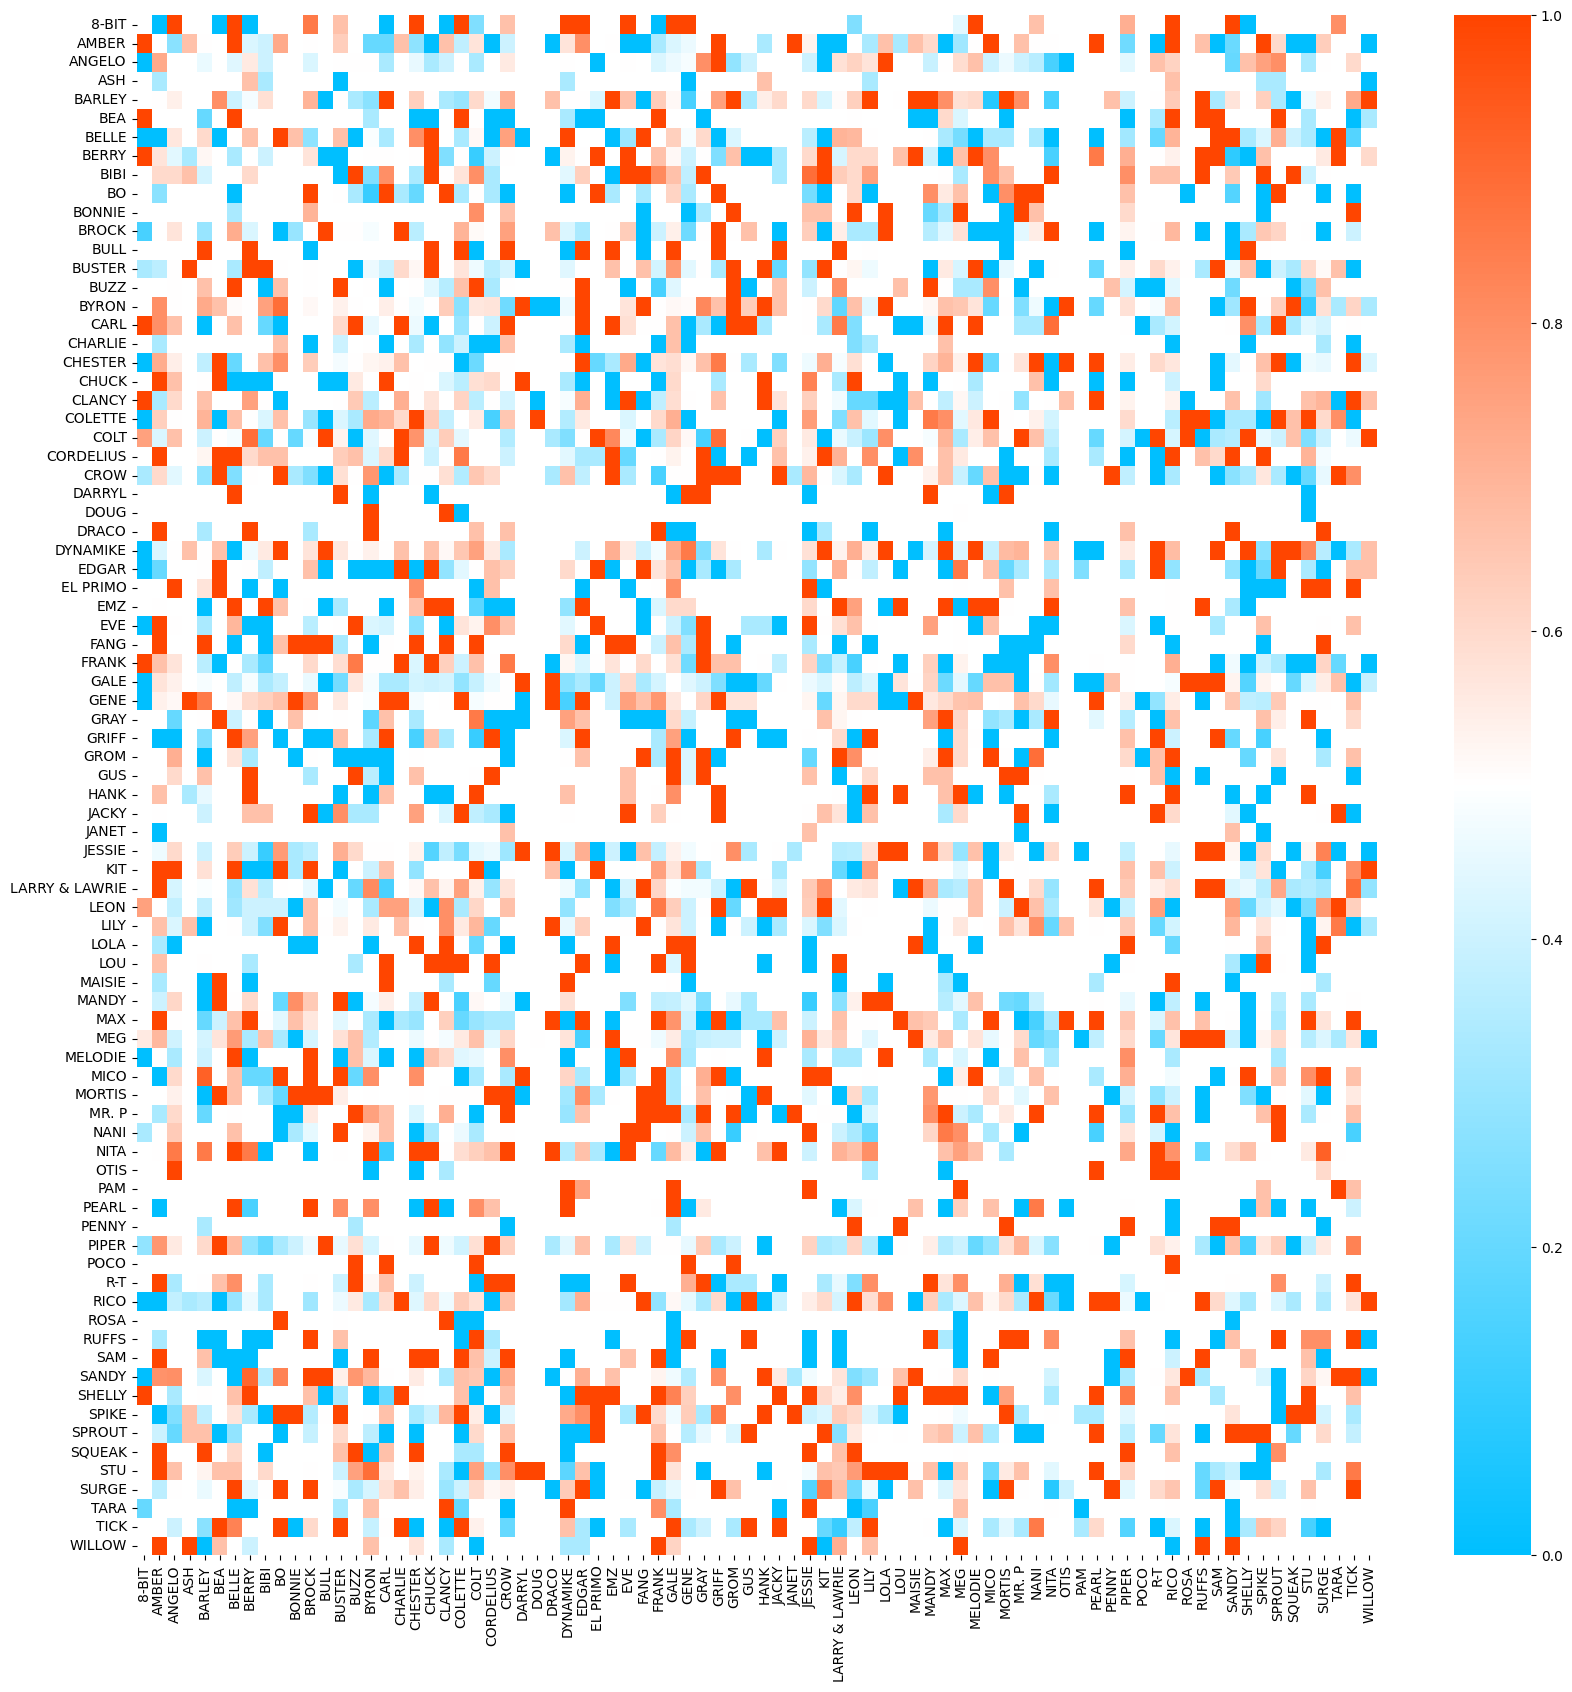

In [46]:
cross_wins = pd.DataFrame(index=brawlers, columns=brawlers)
cross_wins = cross_wins.fillna(0)

cross_games = pd.DataFrame(index=brawlers, columns=brawlers)
cross_games = cross_games.fillna(0)

for row in df.itertuples(index=False):
    victor = row[2]
    team1 = row[3:6]
    team2 = row[6:9]

    for brawler1 in team1:
        for brawler2 in team2:
            if victor == 0:
                continue

            cross_games.loc[brawler1, brawler2] += 1
            cross_games.loc[brawler2, brawler1] += 1
        
            if victor == 1:
                cross_wins.loc[brawler1, brawler2] += 1
            else:
                cross_wins.loc[brawler2, brawler1] += 1

cross_winrates = cross_wins.div(cross_games)

plt.figure(figsize=(20,20))
cmap = LinearSegmentedColormap.from_list('coolwarm_custom', ['#00BFFF', '#FFFFFF', '#FF4500'], N=256)
sns.heatmap(cross_winrates, annot=False, cmap=cmap, vmin=0, vmax=1)

output_dir = os.path.join(cwd, 'output')
os.makedirs(output_dir, exist_ok=True)

plt.savefig(os.path.join(output_dir, 'heatmap.png'), format='png', dpi=300, bbox_inches='tight')

display(cross_winrates)
plt.show()